In [17]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import csv
from textblob import TextBlob
from tweepy import OAuthHandler
from wordcloud import WordCloud, STOPWORDS


#Twitter API credentials
CONSUMER_KEY = "Insert Here"
CONSUMER_SECRET = "Insert Here"
ACCESS_KEY = "Insert Here"
ACCESS_SECRET = "Insert Here"

auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
 
api = tweepy.API(auth, wait_on_rate_limit  = True)

In [14]:
#Open file to append data in csvfile
csvfile = open('public_tweet.csv','a')
csvwriter = csv.writer(csvfile)

In [15]:
for tweet in tweepy.Cursor(api.search, q ="#coronavirusindia", count=100, lang="en",
                           since="2020-03-22").items():
    csvwriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [16]:

pub_tweet= pd.read_csv('public_tweet.csv')
pub_tweet.shape

(26987, 2)

In [21]:
data = pd.read_csv("public_tweet.csv")

tweet_data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
tweet_data.head()

,Tweets
0,RT @zeerajasthan_: #दिल्ली में कोरोना वायरस की...
1,RT @zeerajasthan_: #Jaipur। कोरोना संक्रमण के ...
2,RT @zeerajasthan_: #CoronaUpdate । राजस्थान मे...
3,RT @KrishnaveniA7: Salute to our real heroes! ...
4,RT @DharaviBoys: @STEPHEN_I_Am_ Sir! We are su...


In [23]:
tweet_data['len'] = np.array([len(tweet.text) for tweet in tweets])
tweet_data['ID'] = np.array([tweet.id for tweet in tweets])
tweet_data['Date'] =np.array([tweet.created_at for tweet in tweets])
tweet_data['Source'] = np.array([tweet.source for tweet in tweets])
tweet_data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
tweet_data['RT'] = np.array([tweet.retweet_count for tweet in tweets])
tweet_data.to_csv("public_tweet.csv")
tweet_data.head()

,Tweets,len,ID,Date,Source,Likes,RT
0,RT @zeerajasthan_: #दिल्ली में कोरोना वायरस की...,140,1256901514385375233,2020-05-03 11:00:47,Twitter for Android,0,1
1,RT @zeerajasthan_: #Jaipur। कोरोना संक्रमण के ...,140,1256901481745317894,2020-05-03 11:00:40,Twitter for Android,0,3
2,RT @zeerajasthan_: #CoronaUpdate । राजस्थान मे...,140,1256901463265198080,2020-05-03 11:00:35,Twitter for Android,0,2
3,RT @KrishnaveniA7: Salute to our real heroes! ...,126,1256901401176727552,2020-05-03 11:00:20,Twitter for Android,0,1
4,RT @DharaviBoys: @STEPHEN_I_Am_ Sir! We are su...,139,1256901337289236480,2020-05-03 11:00:05,Tweet Good,0,1


In [24]:
data = pd.read_csv("public_tweet.csv")
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Tweets,len,ID,Date,Source,Likes,RT
0,RT @zeerajasthan_: #दिल्ली में कोरोना वायरस की...,140,1256901514385375233,2020-05-03 11:00:47,Twitter for Android,0,1
1,RT @zeerajasthan_: #Jaipur। कोरोना संक्रमण के ...,140,1256901481745317894,2020-05-03 11:00:40,Twitter for Android,0,3
2,RT @zeerajasthan_: #CoronaUpdate । राजस्थान मे...,140,1256901463265198080,2020-05-03 11:00:35,Twitter for Android,0,2
3,RT @KrishnaveniA7: Salute to our real heroes! ...,126,1256901401176727552,2020-05-03 11:00:20,Twitter for Android,0,1
4,RT @DharaviBoys: @STEPHEN_I_Am_ Sir! We are su...,139,1256901337289236480,2020-05-03 11:00:05,Tweet Good,0,1


In [25]:
# To get tweet with maximum likes, maximum retweets, minimum likes
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RT'])
fav_min = np.min(data['Likes'])
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RT == rt_max].index[0]
fav_tweet = data['Tweets'][fav]
rt_tweet = data['Tweets'][rt]
least_fav = data['Tweets'][fav_min]

In [26]:

print(f"The tweet with maximum likes is : \n{fav_tweet}")
print(f"Number of likes: {fav_max}")
print(f"\nThe tweet with more retweets is: \n{rt_tweet}")
print(f"Number of retweets: {rt_max}")
print(f"\nThe tweet with minimum likes is : \n{least_fav}")
print(f"Number of likes: {fav_min}")

The tweet with maximum likes is : 
क्या अब कोरोना भी हमेशा के लिए एक बीमारी का रूप ले चुका है ? देश का सबसे बड़ा सर्वे ! और उस पर देश के सबसे बड़े डॉ… https://t.co/8rgzrzmwKD
Number of likes: 73

The tweet with more retweets is: 
RT @supriyasahuias: Look at the  wonderful way relief material is being  distributed in Manipur. Dignity and respect for everyone in the en…
Number of retweets: 6063

The tweet with minimum likes is : 
RT @zeerajasthan_: #दिल्ली में कोरोना वायरस की वजह से CRPF मुख्यालय सील !

@crpfindia @PMOIndia @narendramodi @AmitShah @drharshvardhan #In…
Number of likes: 0


In [28]:
# function to clean tweet and to perform sentiment analysis
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",tweet).split())
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity >0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data["Tweets"]])
data.head()

,Tweets,len,ID,Date,Source,Likes,RT,len_group,SA
0,RT @zeerajasthan_: #दिल्ली में कोरोना वायरस की...,140,1256901514385375233,2020-05-03 11:00:47,Twitter for Android,0,1,100 to 140,0
1,RT @zeerajasthan_: #Jaipur। कोरोना संक्रमण के ...,140,1256901481745317894,2020-05-03 11:00:40,Twitter for Android,0,3,100 to 140,0
2,RT @zeerajasthan_: #CoronaUpdate । राजस्थान मे...,140,1256901463265198080,2020-05-03 11:00:35,Twitter for Android,0,2,100 to 140,0
3,RT @KrishnaveniA7: Salute to our real heroes! ...,126,1256901401176727552,2020-05-03 11:00:20,Twitter for Android,0,1,100 to 140,1
4,RT @DharaviBoys: @STEPHEN_I_Am_ Sir! We are su...,139,1256901337289236480,2020-05-03 11:00:05,Tweet Good,0,1,100 to 140,1


In [29]:
#To prepare the list of positive, negative and neutral tweets
positive =[]
negative =[]
neutral =[]
for value in data['SA']:
    if value >0:
        positive.append(data['Tweets'])
    elif value <0:
        negative.append(data['Tweets'])
    else:
        neutral.append(data['Tweets'])

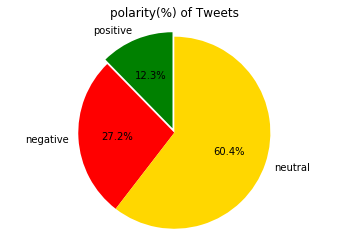

In [30]:
# to plot polarity(%) of PM's tweet
tweet_count =[len(positive),len(negative),len(neutral)]
labels = ["positive", "negative", "neutral"]
colors =['g','r','gold']
explode=(0.05,0,0)
plt.pie(tweet_count,labels=labels,explode=explode,colors=colors, autopct="%0.1f%%", startangle=90)
plt.title("polarity(%) of Tweets")
plt.axis("equal")
plt.savefig("piechart1")
plt.show()

In [31]:
import nltk

In [32]:
# Tokenization of tweets
data['tidy tweet'] = np.array([clean_tweet(tweet) for tweet in data['Tweets']])
token_tweet = data['tidy tweet'].apply(lambda x: x.split())
token_tweet.head()

0                                       [RT, CRPF, In]
1                                         [RT, Jaipur]
2                           [RT, CoronaUpdate, 2, 832]
3    [RT, Salute, to, our, real, heroes, coronaviru...
4    [RT, I, Am, Sir, We, are, sure, your, good, de...
Name: tidy tweet, dtype: object

In [33]:
for i in range(len(token_tweet)):
    token_tweet[i] = ' '.join(token_tweet[i])
data['tidy tweet'] = token_tweet
data.head()

,Tweets,len,ID,Date,Source,Likes,RT,len_group,SA,tidy tweet
0,RT @zeerajasthan_: #दिल्ली में कोरोना वायरस की...,140,1256901514385375233,2020-05-03 11:00:47,Twitter for Android,0,1,100 to 140,0,RT CRPF In
1,RT @zeerajasthan_: #Jaipur। कोरोना संक्रमण के ...,140,1256901481745317894,2020-05-03 11:00:40,Twitter for Android,0,3,100 to 140,0,RT Jaipur
2,RT @zeerajasthan_: #CoronaUpdate । राजस्थान मे...,140,1256901463265198080,2020-05-03 11:00:35,Twitter for Android,0,2,100 to 140,0,RT CoronaUpdate 2 832
3,RT @KrishnaveniA7: Salute to our real heroes! ...,126,1256901401176727552,2020-05-03 11:00:20,Twitter for Android,0,1,100 to 140,1,RT Salute to our real heroes coronavirusindia ...
4,RT @DharaviBoys: @STEPHEN_I_Am_ Sir! We are su...,139,1256901337289236480,2020-05-03 11:00:05,Tweet Good,0,1,100 to 140,1,RT I Am Sir We are sure your good deed will en...


In [40]:
pos_word =' '.join([text for text in data['tidy tweet'][data['SA'] == 1]])
neutral_word=' '.join([text for text in data['tidy tweet'][data['SA'] == 0]])


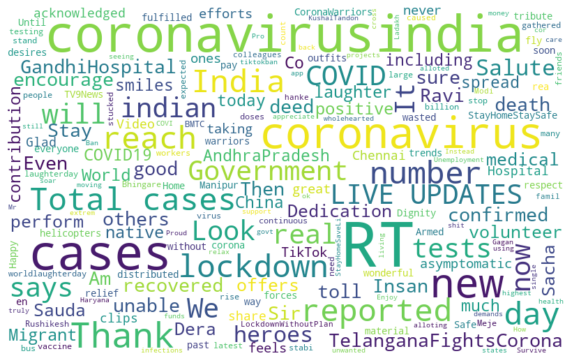

In [35]:
#Generate wordcloud of positive tweets
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=800, height=500, background_color='white',stopwords=stopwords, max_font_size=90).generate(pos_word)
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('wordcloud.png', bbox_inches='tight')

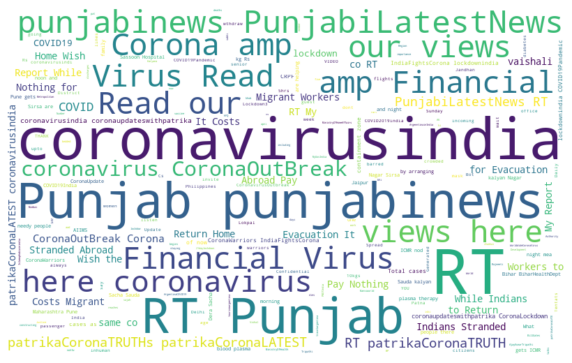

In [36]:
#wordcloud of neutral tweets
wordcloud2 = WordCloud(width=800, height=500,  max_font_size=90, background_color='white').generate(neutral_word)
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.savefig('wordcloud2.png', bbox_inches='tight')